# Data Featurization

Here, we will show some simple examples of featurizing materials composition data using so-called "composition-based feature vectors", or CBFVs. This methods represents a single chemical formula as one vector based on its constituent atoms' chemical properties (refer to the paper for more information and references).

Note that the steps shown in this notebook are intended to demonstrate the best practices associated with featurizing materials data, using *one* way of featurizing materials composition data as an example. 
Depending on your input data and your particular modeling needs, the data featurization method and procedure you use may be different than the example shown here.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from collections import OrderedDict

#Set a random seed to ensure reproducibility across runs
RNG_SEED = 42 #the answer to ultimate question of life, the universe, and everything
np.random.seed(RNG_SEED)

## Loading data


We will start with the dataset splits that we saved from the last notebook.

In [3]:
#getting the paths for all the data
PATH = os.getcwd()
train_path = os.path.join(PATH, "../data_for_notebook_bestpractice/cp_train_byme.csv")
val_path = os.path.join(PATH, "../data_for_notebook_bestpractice/cp_val_byme.csv")
test_path = os.path.join(PATH, "../data_for_notebook_bestpractice/cp_test_byme.csv")

#now that the paths are created, we can make the dataframes
df_train = pd.read_csv(train_path)
df_val = pd.read_csv(val_path)
df_test = pd.read_csv(test_path)

print("df_train dataframe shape is", df_train.shape)
print("df_val dataframe shape is", df_val.shape)
print("df_test dataframe shape is", df_test.shape)

df_train dataframe shape is (3214, 3)
df_val dataframe shape is (980, 3)
df_test dataframe shape is (370, 3)


## Sub-sampling your data (optional)

If your dataset is too large, you can subsample it to be a smaller size.
This is useful for prototyping and for making quick sanity tests of new models / parameters.

Just be aware that you do not introduce any bias into your data through the sampling.

In [4]:
df_train_sample = df_train.sample(n = 2000, random_state = RNG_SEED) #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html
df_val_sample = df_val.sample(n = 200, random_state = RNG_SEED)
df_test_sample = df_test.sample(n = 200, random_state = RNG_SEED)

print(f"shape of df_train-sample:{df_train_sample.shape}\nshape of df_val_sample:{df_val_sample.shape}\nshape of df_test_sample{df_test_sample.shape}")

shape of df_train-sample:(2000, 3)
shape of df_val_sample:(200, 3)
shape of df_test_sample(200, 3)


## Generate features using the `CBFV` package

To featurize the chemical compositions from a chemical formula (e.g. "Al2O3") into a composition-based feature vector (CBFV), we use the open-source [`CBFV` package](https://github.com/kaaiian/CBFV).

We have downloaded and saved a local copy of the package into this repository for your convenience.
For the most updated version, refer to the GitHub repository linked above.

In [5]:
#Import the package and the generate_features function 

#Import to keep track of what folder this is in!!! not calling from online, it is in the same directory as this code (kinda)
from CBFV.cbfv.composition import generate_features

The `generate_features` function from the CBFV package expects an input DataFrame containing at least the columns `['formula', 'target']`. You may also have extra feature columns (e.g., `temperature` or `pressure`, other measurement conditions, etc.).

In our dataset, `Cp` represents the target variable, and `T` is the measurement condition.
Since the `generate_features` function expects the target variable column to be named `target`, we have to rename the `Cp` column.

In [6]:
print('DataFrame column names before renaming:')
print(df_train.columns)
print(df_val.columns)
print(df_test.columns)

#renaming Cp column to "target"
rename_cp = {"Cp" : "target"}
df_train = df_train.rename(columns = rename_cp) #finds key "Cp" and replaces its value with "target"
df_val = df_val.rename(columns = rename_cp)
df_test = df_test.rename(columns = rename_cp)

df_train_sample = df_train_sample.rename(columns = rename_cp)
df_val_sample = df_val_sample.rename(columns = rename_cp)
df_test_sample = df_test_sample.rename(columns = rename_cp)

print('\nDataFrame column names after renaming:')
print(df_train.columns)
print(df_val.columns)
print(df_test.columns)

DataFrame column names before renaming:
Index(['formula', 'T', 'Cp'], dtype='object')
Index(['formula', 'T', 'Cp'], dtype='object')
Index(['formula', 'T', 'Cp'], dtype='object')

DataFrame column names after renaming:
Index(['formula', 'T', 'target'], dtype='object')
Index(['formula', 'T', 'target'], dtype='object')
Index(['formula', 'T', 'target'], dtype='object')


Now we can use the `generate_features` function to generate the CBFVs from the input data.

Note that we have specified several keyword arguments in our call to `generate_features`:
* `elem_prop='oliynyk'`
* `drop_duplicates=False`
* `extend_features=True`
* `sum_feat=True`

A short explanation for the choice of keyword arguments is below:
* The `elem_prop` parameter specifies which CBFV featurization scheme to use (there are several). For this tutorial, we have chosen to use the `oliynyk` CBFV featurization scheme.
* The `drop_duplicates` parameter specifies whether to drop duplicate formulae during featurization. In our case, we want to preserve duplicate formulae in our data (`True`), since we have multiple heat capacity measurements (performed at different temperatures) for the same compound.
* The `extend_features` parameter specifies whether to include extended features (features that are not part of `['formula', 'target']`) in the featurized data. In our case, this is our measurement temperature, and we want to include this information (`True`), since this is pertinent information for the heat capacity prediction.
* The `sum_feat` parameter specifies whether to calculate the sum features when generating the CBFVs for the chemical formulae. We do in our case (`True`).

For more information about the `generate_features` function and the CBFV featurization scheme, refer to the GitHub repository and the accompanying paper to this notebook.

# need to play around with this generate features function
# probably in a new notebook 
# just want a feel of what its inputs, outputs, etc are

In [7]:
#note that what is labelled here is unscaled!!!
X_train_unscaled, y_train, formulae_train, skipped_train = generate_features(df_train_sample, elem_prop = 'oliynyk', drop_duplicates = False, extend_features = True, sum_feat = True)
X_val_unscaled, y_val, formulae_val, skipped_val = generate_features(df_val_sample, elem_prop = 'oliynyk', drop_duplicates = False, extend_features = True, sum_feat = True)
X_test_unscaled, y_test, formulae_test, skipped_test = generate_features(df_test_sample, elem_prop = 'oliynyk', drop_duplicates = False, extend_features = True, sum_feat = True)

#wtf is this
#need to figure out what the hell this is

#I think drop_duplicates will remove a formula if seen more than once i.e. only keep first example of it
#for Cp there will be same formula at many different temps so we don't want to get rid of duplicates
#therefore it is set to false

#similar to splittig data into train/val/test am unsure how to know what to put to the left of the = sign
#i.e. why is it X_train_unscaled, y_train, formulae_train, skipped_train and in that order

#think that sum means if H2o2 atomic no = 34 etc. adds up values associated with each element in compound

Processing Input Data: 100%|████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 12976.94it/s]


	Featurizing Compositions...


Assigning Features...: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 4731.70it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|██████████████████████████████████████████████████████| 200/200 [00:00<00:00, 11397.87it/s]


	Featurizing Compositions...


Assigning Features...: 100%|███████████████████████████████████████████████████████| 200/200 [00:00<00:00, 6026.47it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|██████████████████████████████████████████████████████| 200/200 [00:00<00:00, 10942.47it/s]


	Featurizing Compositions...


Assigning Features...: 100%|███████████████████████████████████████████████████████| 200/200 [00:00<00:00, 5453.70it/s]


	Creating Pandas Objects...


To see what a featurized X matrix looks like, `.head()` will show us some rows:

In [12]:
X_train_unscaled.head()

,sum_Atomic_Number,sum_Atomic_Weight,sum_Period,sum_group,sum_families,sum_Metal,sum_Nonmetal,sum_Metalliod,sum_Mendeleev_Number,sum_l_quantum_number,...,range_Melting_point_(K),range_Boiling_Point_(K),range_Density_(g/mL),range_specific_heat_(J/g_K)_,range_heat_of_fusion_(kJ/mol)_,range_heat_of_vaporization_(kJ/mol)_,range_thermal_conductivity_(W/(m_K))_,range_heat_atomization(kJ/mol),range_Cohesive_energy,T
0,32.0,65.116040,8.0,30.0,15.0,1.0,2.0,0.0,162.0,2.0,...,2.642621e+06,4.742507e+06,0.858492,0.021622,2388.183171,22965.815879,3091.366423,66594.888889,7.034755,600.0
1,28.0,53.491200,9.0,36.0,43.0,0.0,6.0,0.0,544.0,2.0,...,4.363940e+03,8.544527e+03,0.000002,40.816697,1.696930,17.270367,0.006030,22037.555556,4.284089,457.7
2,46.0,98.887792,14.0,72.0,36.0,3.0,4.0,0.0,441.0,4.0,...,4.009057e+05,1.662798e+06,0.601941,1.321867,10.138486,13933.526946,6716.921700,10368.666667,1.070067,300.0
3,20.0,41.988171,5.0,18.0,9.0,1.0,1.0,0.0,95.0,1.0,...,2.521744e+04,2.868138e+05,0.234886,0.042025,1.372178,2194.463394,4968.283245,225.000000,0.018632,2800.0
4,82.0,207.200000,6.0,14.0,5.0,1.0,0.0,0.0,81.0,1.0,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1400.0


In [13]:
X_train_unscaled.shape

(2000, 177)

Note the `sum` features in the CBFV, which we have included by using `sum_feat=True` in the call to `generate_features`.

Also note the temperature column `T` at the end of this featurized data.

What we have done above is featurize the input data. In the featurized data, each row contains a unique CBFV that describes a given chemical composition.

## Data scaling & normalization

For numerical input data, scaling and normalization of the features often improves the model performance.
Scaling can partially correct the discrepancy between the orders of magnitudes of the features (e.g., some numerical features being much larger or smaller than others).
This typically improves the model learning performance, and in turn, improves the model performance.

We will scale then normalize our input data using scikit-learn's built-in `StandardScaler` class and `normalize` function.

Note, in addition to `StandardScaler`, other scalers such as `RobustScaler` and `MinMaxScaler` are also available in scikit-learn. Consult the documentation for the details and when to use them.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

## Scaling the data

First, we instantiate the scaler object.

In a `StandardScaler` object:
* During the `fit` process, the statistics of the input data (mean and standard deviation) are computed.
* Then, during the `transform` process, the mean and standard deviation values calculated above are used to scale the data to having zero-mean and unit variance.

Therefore, for the first time usage of the scaler, we call the `.fit_transform()` method to fit the scaler to the input data, and then to transform the same data.
For subsequent uses, since we have already computed the statistics, we only call the `.transform()` method to scale data.

# **Note:** you should *only* `.fit()` the scaler using the training dataset statistics, and then use these same statistics from the training dataset to `.transform()` the other datasets (validation and train).

In [15]:
#Always scale first and then normalise!!!
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_unscaled) #calculated mean and standard dev, scales to 0 mean and sigma = 1
X_val = scaler.transform(X_val_unscaled)         #scales the val and test, from stats found in train (scalar.fit())
X_test = scaler.transform(X_test_unscaled)

## Normalizing the scaled data

We repeat a similar process for normalizing the data.
Here, there is no need to first fit the normalizer, since the normalizer scales the rows of the input data to unit norm independently of other rows.

The normalizer is different to a Scaler in that the normalizer acts row-wise, whereas a Scaler acts column-wise on the input data.

In [11]:
#I need to look into scaling vs normalising more
#Possibly plot histogram of some data I have and see how it changes before and after scaling/normalisation
X_train = normalize(X_train)
X_val = normalize(X_val)
X_test = normalize(X_test)

# Modeling using "classical" machine learning models

Here we implement some classical ML models from `sklearn`:

* Ridge regression
* Support vector machine
* Linear support vector machine
* Random forest
* Extra trees
* Adaptive boosting
* Gradient boosting
* k-nearest neighbors
* Dummy (if you can't beat this, something is wrong.)

Note: the Dummy model types from `sklearn` act as a good sanity check for your ML studies. If your models do not perform significantly better than the equivalent Dummy models, then you should know that something has gone wrong in your model implementation.

In [12]:
from time import time

from sklearn.dummy import DummyRegressor

from sklearn.linear_model import Ridge

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR
from sklearn.svm import LinearSVR

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In addition, we define some helper functions.

In [13]:
#should probably figure out what the hell this stuff is
#no clue what a lot of the stuff here is I need to dig into it definitely

#tells you which model is being usitilised?
def instantiate_model(model_name):
    model = model_name()       #assigns class "model_name()" to varianle "model"  
    return model


def fit_model(model, X_train, y_train): #fits model annd returns time taken and model name
    ti = time()
    model = instantiate_model(model)
    model.fit(X_train, y_train)
    fit_time = time() - ti
    return model, fit_time


def evaluate_model(model, X, y_act): #compares model prediction with actual values to find the error
    y_pred = model.predict(X)        #different metrics for accuracy are then returned
    r2 = r2_score(y_act, y_pred)
    mae = mean_absolute_error(y_act, y_pred)
    rmse_val = mean_squared_error(y_act, y_pred, squared=False)
    return r2, mae, rmse_val


def fit_evaluate_model(model, model_name, X_train, y_train, X_val, y_act_val): #fits and evaluates model on train and val data
    model, fit_time = fit_model(model, X_train, y_train) #fits model and returns time taken and name
    r2_train, mae_train, rmse_train = evaluate_model(model, X_train, y_train) #accuracy from training
    r2_val, mae_val, rmse_val = evaluate_model(model, X_val, y_act_val) #accuracy from validation
    result_dict = {                                                      
        'model_name': model_name,
        'model_name_pretty': type(model).__name__,            #creates a dictionary
        'model_params': model.get_params(),                   #this is in the form "name of thing" : "value of thing"
        'fit_time': fit_time,                                 #can then be iterated to create dataframe
        'r2_train': r2_train,                                 #then retuns ("model?") and the dictionary
        'mae_train': mae_train,                               #this is basically one row of a dataframe
        'rmse_train': rmse_train,
        'r2_val': r2_val,
        'mae_val': mae_val,
        'rmse_val': rmse_val}
    return model, result_dict


def append_result_df(df, result_dict):  #creates df from dictionary, then returns it
    df_result_appended = df.append(result_dict, ignore_index=True) #ignore index means rows not numbered
    return df_result_appended


def append_model_dict(dic, model_name, model): #not sure
    dic[model_name] = model                    #think it creates list of model names??
    return dic

Build an empty DataFrame to store model results:

In [14]:
#creating a data frame and labelling columns
df_classics = pd.DataFrame(columns=['model_name',
                                    'model_name_pretty',
                                    'model_params',
                                    'fit_time',
                                    'r2_train',
                                    'mae_train',
                                    'rmse_train',
                                    'r2_val',
                                    'mae_val',
                                    'rmse_val'])
df_classics

,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train,r2_val,mae_val,rmse_val


## Define the models

Here, we instantiate several classical machine learning models for use.
For demonstration purposes, we instantiate the models with their default model parameters.

Some of the models listed above can perform either regression or classification tasks.
Because our ML task is a regression task (prediction of the continuous-valued target, heat capacity), we choose the regression variant of these models.

Note: the `DummyRegressor()` instance acts as a good sanity check for your ML studies. If your models do not perform significantly better than the `DummyRegressor()`, then you know something has gone awry.

In [15]:
#Build a dictionary of model names
classic_model_names = OrderedDict({ #OrderedDict preserves the order in which the keys are inserted 
    'dumr': DummyRegressor,         #A regular dict doesn’t track the insertion order and iterating
    'rr': Ridge,                    # it gives the values in an arbitrary order
    'abr': AdaBoostRegressor,
    'gbr': GradientBoostingRegressor,
    'rfr': RandomForestRegressor,
    'etr': ExtraTreesRegressor,
    'svr': SVR,
    'lsvr': LinearSVR,
    'knr': KNeighborsRegressor,
})

## Instantiate and fit the models

Now, we can fit the ML models.

We will loop through each of the models listed above. For each of the models, we will:
* instantiate the model (with default parameters)
* fit the model using the training data
* use the fitted model to generate predictions from the validation data
* evaluate the performance of the model using the predictions
* store the results in a DataFrame for analysis

Note: this may take several minutes, depending on your hardware/software environment, dataset size and featurization scheme (CBFV).

In [16]:
#Instantiate a dictionary to store the model objects
classic_models = OrderedDict()

# Keep track of elapsed time
ti = time()

#creating a loop to fit each model and then store the results
for model_name, model in classic_model_names.items():   #no clue NEED TO FIGURE OUT HOW THIS LOOP WORKS
   
    print("Now fitting model", model_name, ":", model.__name__)  #dunno how model_name vs model.__name__ works
    
    model, result_dict = fit_evaluate_model(model, model_name, X_train, y_train, X_val, y_val) #defined above
    #this gives what model is being used and returns dictionary of results
    
    df_classics = append_result_df(df_classics, result_dict) #add results_dict to  df_classics
    
    classic_models = append_model_dict(classic_models, model_name, model) #not sure
    
dt = time() - ti

print("\nFinished fitting", len(classic_models), "\n", dt, "seconds taken") #using the f sting thing is probably better idk


Now fitting model dumr : DummyRegressor
Now fitting model rr : Ridge
Now fitting model abr : AdaBoostRegressor
Now fitting model gbr : GradientBoostingRegressor
Now fitting model rfr : RandomForestRegressor
Now fitting model etr : ExtraTreesRegressor
Now fitting model svr : SVR
Now fitting model lsvr : LinearSVR
Now fitting model knr : KNeighborsRegressor

Finished fitting 9 
 47.42685008049011 seconds taken


Now, we can look at the results.

You will notice, that some of the models (such as RandomForestRegressor, ExtraTreesRegressor and GradientBoostingRegressor) have completely memorized the training data, as evidenced by the very high r2_train scores of ~1.0.

In [17]:
#Sort in order of increasing validation r2 score
df_classics = df_classics.sort_values('r2_val', ignore_index = True) #don't want rows labelled so set to true
df_classics                                                          #although nothing seems to change when it's False?

,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train,r2_val,mae_val,rmse_val
0,dumr,DummyRegressor,"{'constant': None, 'quantile': None, 'strategy...",0.000000,0.000000,47.451805,60.600844,-0.000090,52.577391,71.971190
1,lsvr,LinearSVR,"{'C': 1.0, 'dual': True, 'epsilon': 0.0, 'fit_...",0.016004,0.764211,16.951480,29.426608,0.668681,23.216105,41.425000
2,svr,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",0.637609,0.764333,16.696276,29.419015,0.671962,24.567773,41.219329
3,knr,KNeighborsRegressor,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.000000,0.981833,3.893071,8.168084,0.781098,23.286375,33.671628
4,abr,AdaBoostRegressor,"{'base_estimator': None, 'learning_rate': 1.0,...",3.640379,0.921784,14.297999,16.948337,0.855543,21.273381,27.353180
5,rr,Ridge,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.020003,0.875484,14.429937,21.384104,0.856292,17.456203,27.282207
6,rfr,RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",21.007760,0.998349,1.220525,2.462641,0.889543,14.769915,23.918548
7,etr,ExtraTreesRegressor,"{'bootstrap': False, 'ccp_alpha': 0.0, 'criter...",8.941538,0.999995,0.010897,0.134942,0.905679,13.234496,22.102601
8,gbr,GradientBoostingRegressor,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ...",11.137421,0.984688,5.406267,7.498767,0.911805,13.913852,21.372725


You can now also access the full details of the models by inspecting the `classic_models` dictionary that we populated.

In [18]:
classic_models

OrderedDict([('dumr', DummyRegressor()),
             ('rr', Ridge()),
             ('abr', AdaBoostRegressor()),
             ('gbr', GradientBoostingRegressor()),
             ('rfr', RandomForestRegressor()),
             ('etr', ExtraTreesRegressor()),
             ('svr', SVR()),
             ('lsvr', LinearSVR()),
             ('knr', KNeighborsRegressor())])

## Evaluating model performance on validation dataset

Now comes the time to evaluate the trained models on the validation set.

Remember, we use the same validation set to evaluate all models. This ensures a fair comparison.

In addition, we plot the predicted vs. actual plots using the predictions made by each trained model on the same validation set.

In [19]:
##NEED TO LOOK OVER THIS

#func to plot things how we want
def plot_pred_act(act, pred, model, reg_line=True, label=''):
    xy_max = np.max([np.max(act), np.max(pred)])

    plot = plt.figure(figsize=(6,6))
    plt.plot(act, pred, 'o', ms=9, mec='k', mfc='silver', alpha=0.4)
    plt.plot([0, xy_max], [0, xy_max], 'k--', label='ideal')
    
    if reg_line:
        polyfit = np.polyfit(act, pred, deg=1)
        reg_ys = np.poly1d(polyfit)(np.unique(act))
        plt.plot(np.unique(act), reg_ys, alpha=0.8, label='linear fit')
    
    plt.axis('scaled')
    plt.xlabel(f'Actual {label}')
    plt.ylabel(f'Predicted {label}')
    plt.title(f'{type(model).__name__}, r2: {r2_score(act, pred):0.4f}')
    plt.legend(loc='upper left')
    
    return plot

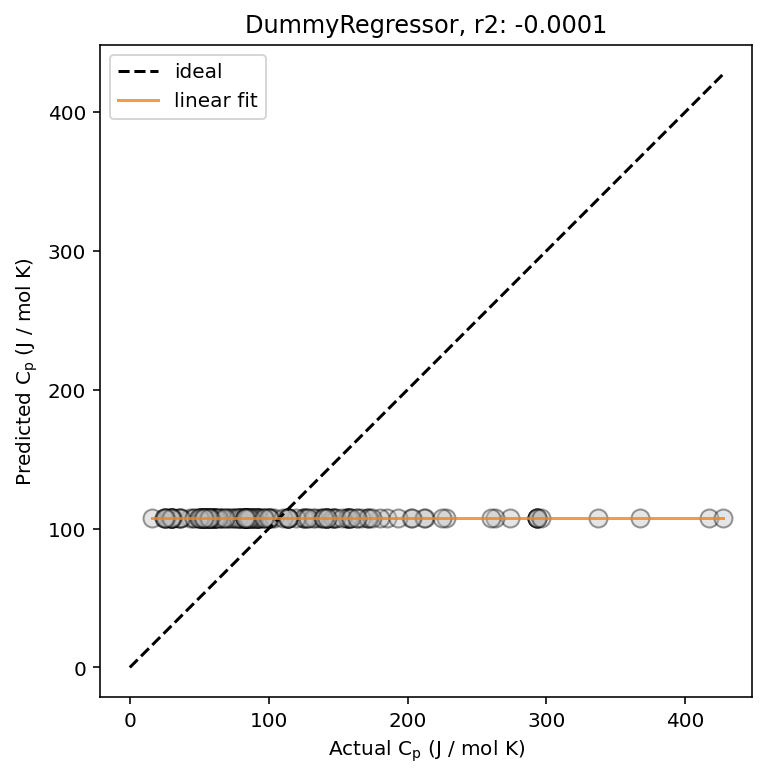

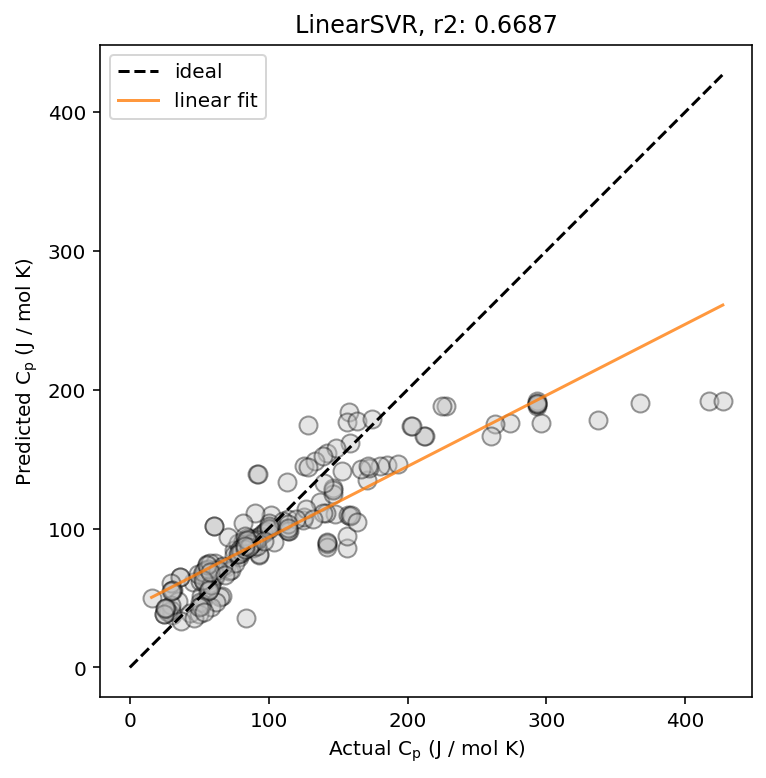

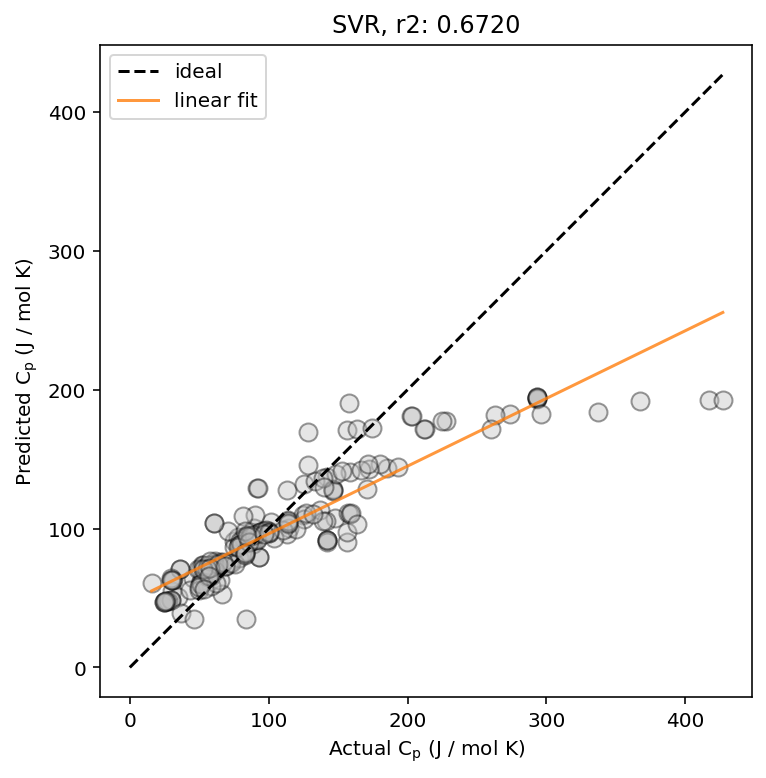

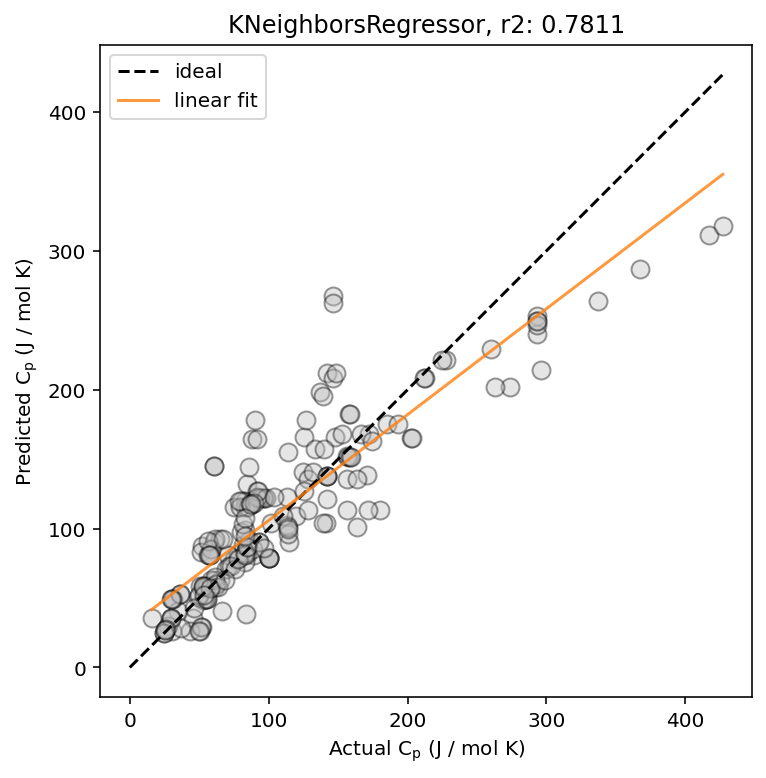

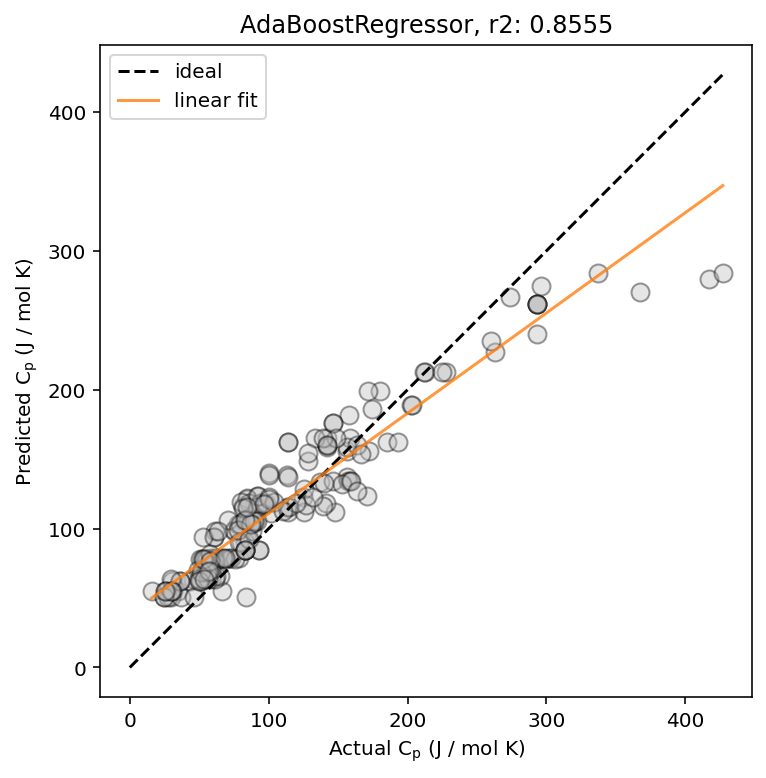

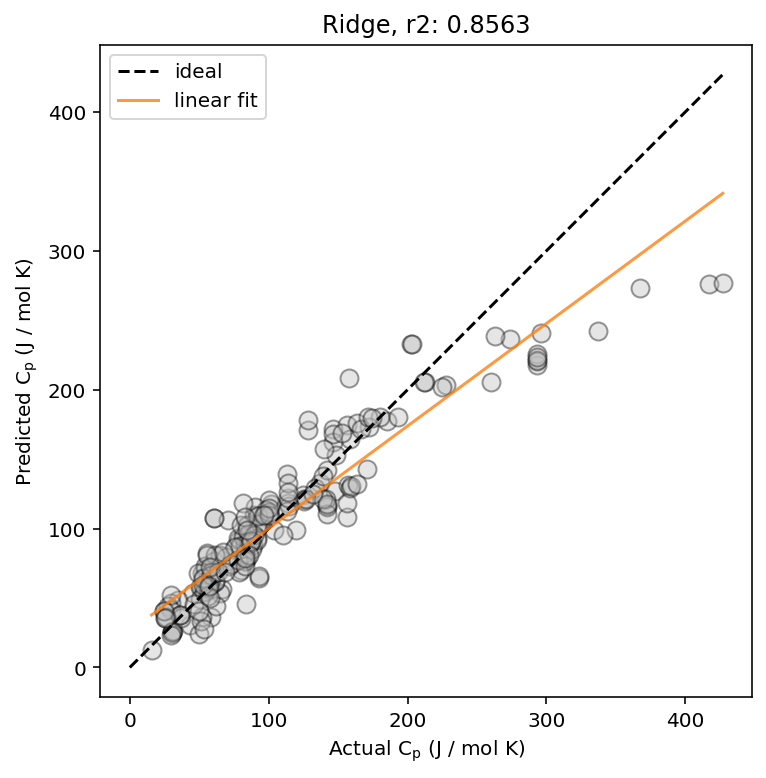

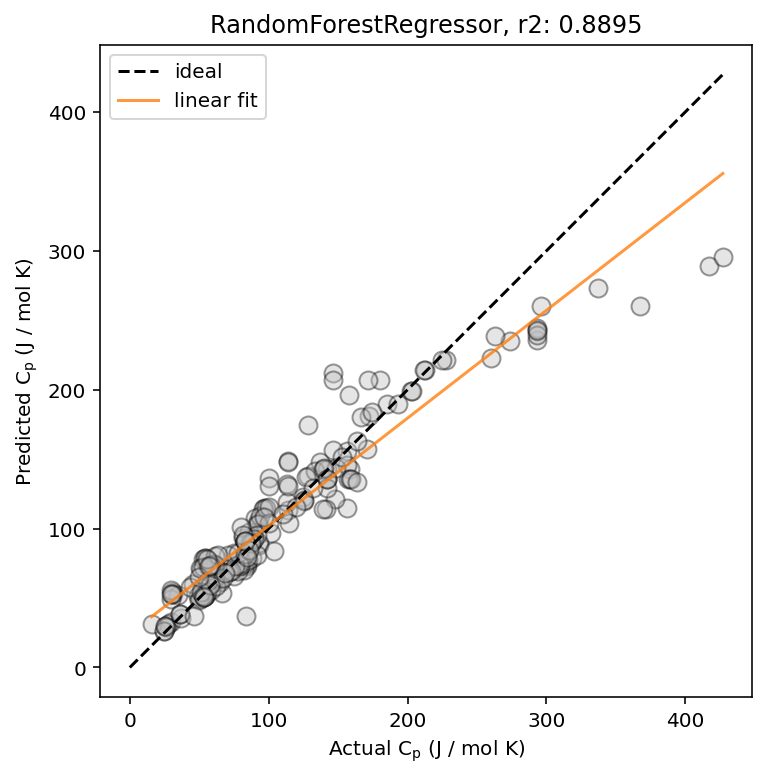

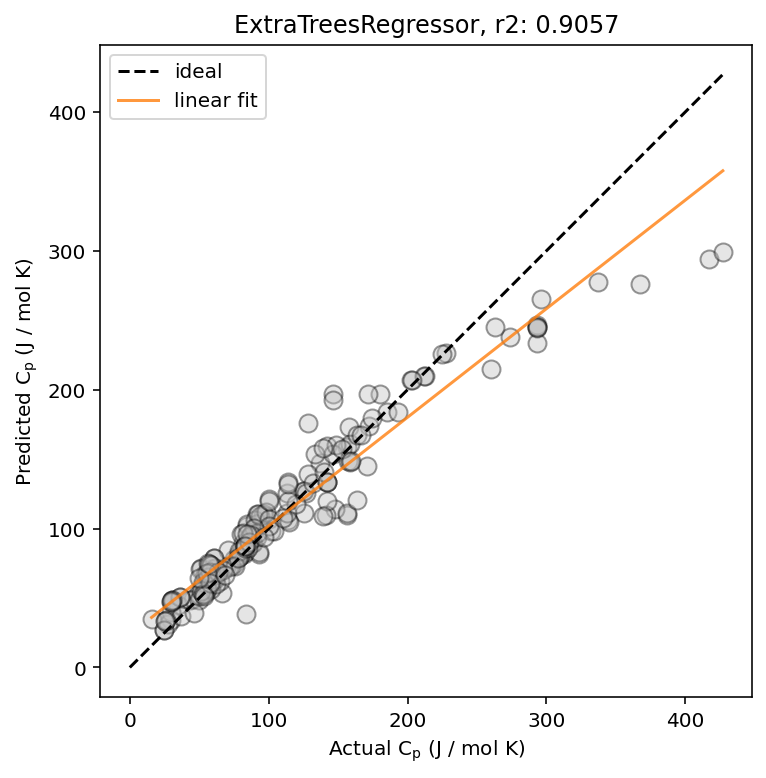

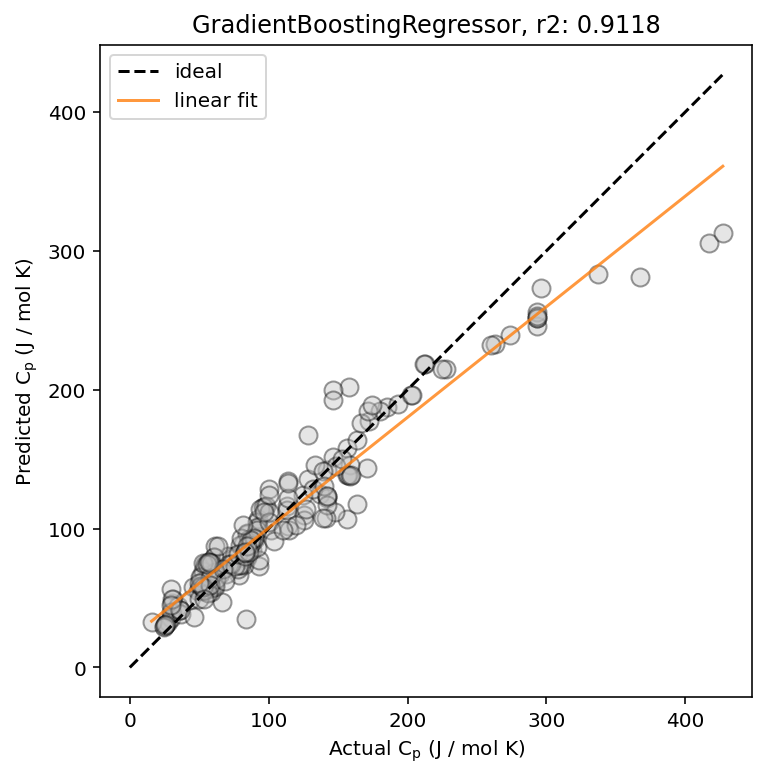

In [20]:
for row in range(df_classics.shape[0]):
    model_name = df_classics.iloc[row]['model_name']

    model = classic_models[model_name]
    y_act_val = y_val
    y_pred_val = model.predict(X_val)

    plot = plot_pred_act(y_act_val, y_pred_val, model, reg_line=True, label='$\mathrm{C}_\mathrm{p}$ (J / mol K)')

## Re-training the best-performing model on combined train + validation dataset

After you have finalized your model, you can re-train your model (using the same hyperparameters) again on the combined train + validation datasets, and finally, evaluate your model on the held-out test dataset.

By training on the combined train + validation dataset after you have finished tuning your model, you give it more training data, which should lead to an increase in the model performance.

In [21]:
#Find the best-performing model that we have tested
best_row = df_classics.iloc[-1, :].copy() #-1 is last row in array, ", :" collects all columns in that row

#Get the model type and model parameters
model_name = best_row['model_name']
model_params = best_row['model_params']

#Instantiate the model again using the parameters
model = classic_model_names[model_name](**model_params) #what?
print(model)

GradientBoostingRegressor()


In [22]:
#Concatenate the train and validation datasets together
X_train_new = np.concatenate((X_train, X_val), axis = 0) #Join a sequence of arrays along an existing axis
y_train_new = pd.concat((y_train, y_val), axis = 0) #Concatenate pandas objects along a particular axis
#why is one pd. and one is np.??


print(X_train_new.shape)

(2200, 177)


Finally, we can fit the model on the combined train + validation dataset.

In [23]:
ti = time()

model.fit(X_train_new, y_train_new)

dt = time() - ti
print("Finished fitting best model, total time taken:", dt)

Finished fitting best model, total time taken: 12.710201025009155


## Testing the re-trained model on the test dataset

After re-fitting the best model on the train+validation dataset, you can finally test it on the test dataset.
**Remember:** you should only do this *once!*

r2 0.8326038988523898
mae 18.233692258451036
rmse 32.16485435203621


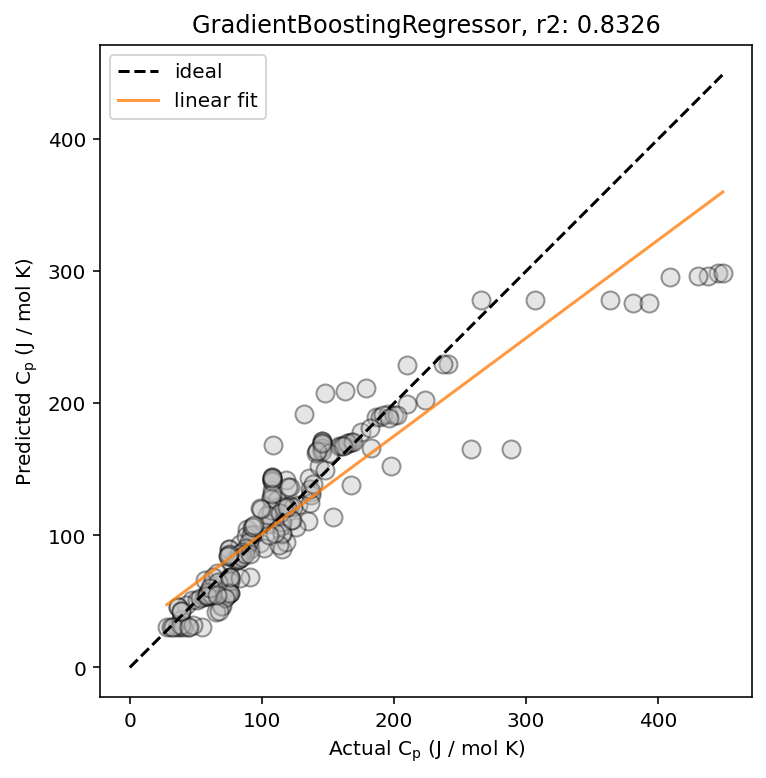

In [24]:
y_act_test = y_test
y_pred_test = model.predict(X_test) #need to look up model.predict etc

r2, mae, rmse = evaluate_model(model, X_test, y_test) #defined above
print("r2", r2)
print("mae", mae)
print("rmse", rmse)

plot = plot_pred_act(y_act_test, y_pred_test, model, reg_line=True, label='$\mathrm{C}_\mathrm{p}$ (J / mol K)')
#defined above

We see that our model achieves decent performance on the held-out test dataset.

## DID NOT LOOK AT STUFF BELOW IN DETAIL
## NEED TO GO BACK OVER A FEW TIMES



# Effect of train/validation/test dataset split

Using different train/validation/test splits can dramatically affect your model performance, even for classical ML models.

Here, we provide a little demonstration.

In [25]:
#still don't understand this
X_train_unscaled, y_train, formulae_train, skipped_train = generate_features(df_train, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_val_unscaled, y_val, formulae_val, skipped_val = generate_features(df_val, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_test_unscaled, y_test, formulae_test, skipped_test = generate_features(df_test, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)

Processing Input Data: 100%|████████████████████████████████████████████████████| 3214/3214 [00:00<00:00, 14549.58it/s]


	Featurizing Compositions...


Assigning Features...: 100%|█████████████████████████████████████████████████████| 3214/3214 [00:00<00:00, 8023.84it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|██████████████████████████████████████████████████████| 980/980 [00:00<00:00, 14383.10it/s]


	Featurizing Compositions...


Assigning Features...: 100%|███████████████████████████████████████████████████████| 980/980 [00:00<00:00, 7867.48it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|██████████████████████████████████████████████████████| 370/370 [00:00<00:00, 12495.91it/s]


	Featurizing Compositions...


Assigning Features...: 100%|███████████████████████████████████████████████████████| 370/370 [00:00<00:00, 6455.75it/s]

	Creating Pandas Objects...


In [26]:
X_train_original = X_train_unscaled.copy()
X_val = X_val_unscaled.copy()
X_test = X_test_unscaled.copy()

y_train_original = y_train.copy()

We sample the training data using 10 random seeds, by using the `DataFrame.sample()` method with seeds ranging from 0 to 9.
We then fit 10 models, each on one of the random splits, and evaluate their performance on the same validation dataset.

In [27]:
#fix this
splits = range(10)
df_splits = pd.DataFrame(columns=['split',
                                  'r2_train',
                                  'mae_train',
                                  'rmse_train',
                                  'r2_val',
                                  'mae_val',
                                  'rmse_val'])

for split in splits:
    print(f'Fitting and evaluating random split {split}')
    X_train = X_train_original.sample(frac=0.7, random_state=split)
    y_train = y_train_original[X_train.index]

    scaler = StandardScaler()
    X_train = normalize(scaler.fit_transform(X_train))
    X_val = normalize(scaler.transform(X_val_unscaled))
    X_test = normalize(scaler.transform(X_test_unscaled))
    
    model = AdaBoostRegressor()
    model.fit(X_train, y_train)
    y_act_val = y_val
    y_pred_val = model.predict(X_val)

    r2_train, mae_train, rmse_train = evaluate_model(model, X_train, y_train)
    r2_val, mae_val, rmse_val = evaluate_model(model, X_val, y_val)
    result_dict = {
        'split': split,
        'r2_train': r2_train,
        'mae_train': mae_train,
        'rmse_train': rmse_train,
        'r2_val': r2_val,
        'mae_val': mae_val,
        'rmse_val': rmse_val}
    
    df_splits = append_result_df(df_splits, result_dict)

Fitting and evaluating random split 0
Fitting and evaluating random split 1
Fitting and evaluating random split 2
Fitting and evaluating random split 3
Fitting and evaluating random split 4
Fitting and evaluating random split 5
Fitting and evaluating random split 6
Fitting and evaluating random split 7
Fitting and evaluating random split 8
Fitting and evaluating random split 9


In [28]:
df_splits['split'] = df_splits['split'].astype(int)
df_splits

,split,r2_train,mae_train,rmse_train,r2_val,mae_val,rmse_val
0,0,0.918620,14.610956,17.304284,0.799819,24.268360,35.931062
1,1,0.924420,13.854261,16.625062,0.825680,22.591577,33.529897
2,2,0.924687,13.982933,16.837988,0.811933,23.479620,34.826965
3,3,0.929560,13.426549,16.190765,0.834667,20.788418,32.654214
4,4,0.923825,14.042963,16.759764,0.808858,22.938367,35.110513
5,5,0.921603,14.259939,17.044278,0.813722,22.926380,34.660902
6,6,0.924993,14.055939,16.802827,0.809255,23.652571,35.074021
7,7,0.919847,14.357791,17.055284,0.807060,23.949893,35.275238
8,8,0.924480,13.809817,16.591275,0.814575,22.999819,34.581479
9,9,0.919606,14.195423,16.947638,0.802441,23.843298,35.694990


We then plot the train and validation $r^2$ scores for each of the 10 models.

Note the high variability in the r2_val score. In contrast, the variability in the r2_train score is comparatively lower.

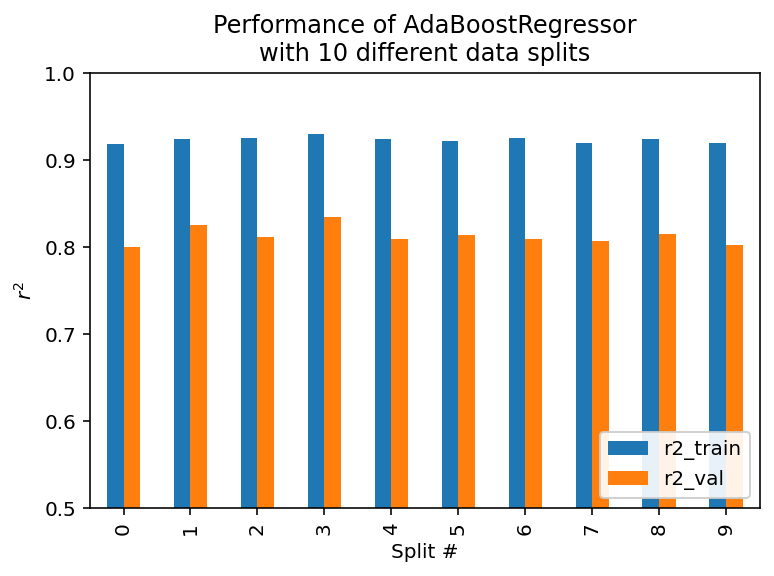

In [29]:
df_splits.plot('split', ['r2_train', 'r2_val'], kind='bar')
plt.title(f'Performance of {type(model).__name__}\nwith {len(splits)} different data splits')
plt.ylim((0.5, 1.0))
plt.ylabel('$r^2$')
plt.xlabel('Split #')
plt.legend(loc='lower right', framealpha=0.9)
plt.show()

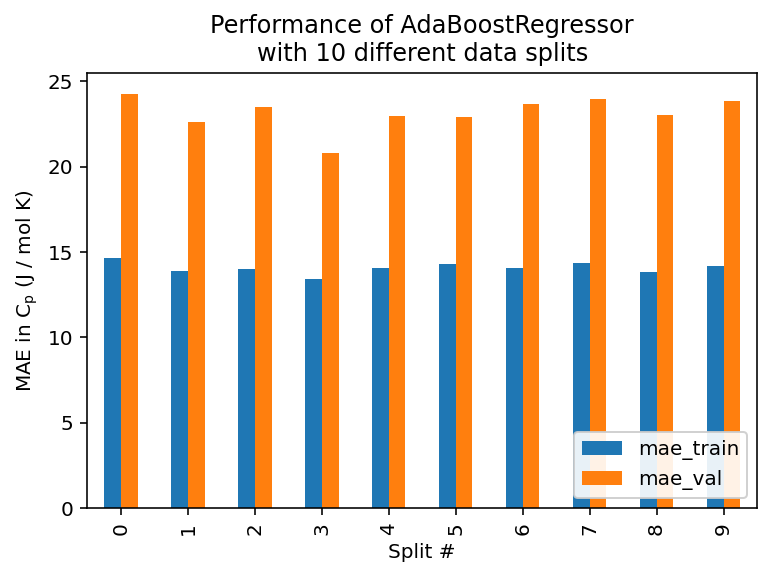

In [30]:
df_splits.plot('split', ['mae_train', 'mae_val'], kind='bar')
plt.title(f'Performance of {type(model).__name__}\nwith {len(splits)} different data splits')
plt.ylabel('MAE in $\mathrm{C}_\mathrm{p}$ (J / mol K)')
plt.xlabel('Split #')
plt.legend(loc='lower right', framealpha=0.9)
plt.show()

Therefore, typically the average value of all the scores are reported, as this gives a much more accurate estimate of how well the model actually performs.

In [31]:
avg_r2_val = df_splits['r2_val'].mean()
avg_mae_val = df_splits['mae_val'].mean()

print(f'Average validation r2: {avg_r2_val:0.4f}')
print(f'Average validation MAE: {avg_mae_val:0.4f}')

Average validation r2: 0.8128
Average validation MAE: 23.1438
